In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [3]:
x = np.array([[1,2],[4,6],[8,9], [3,4], [2,6], [4,9]])
y = np.array([0, 1, 1, 0, 0, 1])
y.shape[0]

6

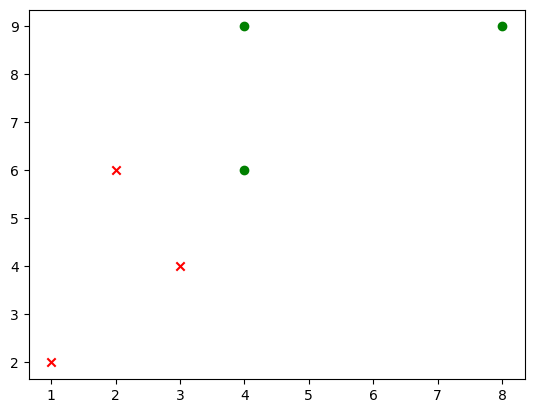

In [4]:
x = np.array([[1,2],[4,6],[8,9], [3,4], [2,6], [4,9]])
y = np.array([0, 1, 1, 0, 0, 1])
for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

In [5]:
kernel_used = 'linear'
Classifier = SVC(gamma = 'auto', kernel = kernel_used)
Classifier.fit(x, y)

SVC(gamma='auto', kernel='linear')

In [6]:
weight_matrix = Classifier.coef_[0]
slope = -weight_matrix[0]/weight_matrix[1]
bias = - Classifier.intercept_[0]/weight_matrix[1]
val = np.linspace(0, 14)
boundary = slope * val + bias
print("slope:",slope)
print("bias:", bias)

slope: -1.9980818414322232
bias: 11.993606138107411


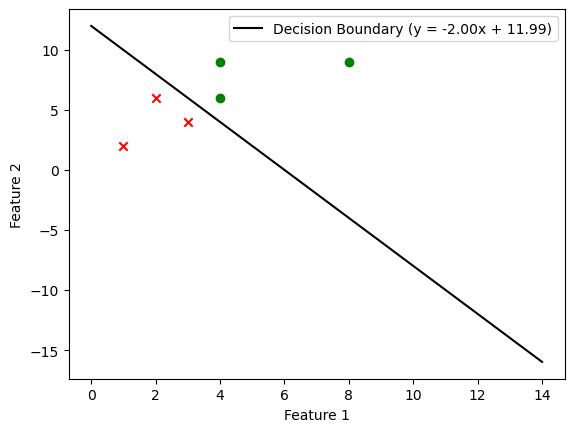

Equation of the decision boundary: y = -2.00x + 11.99


In [8]:
for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

plt.plot(val, boundary, 'k', label=f"Decision Boundary (y = {slope:.2f}x + {bias:.2f})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
print(f"Equation of the decision boundary: y = {slope:.2f}x + {bias:.2f}")

## Non-Linear Classifier:

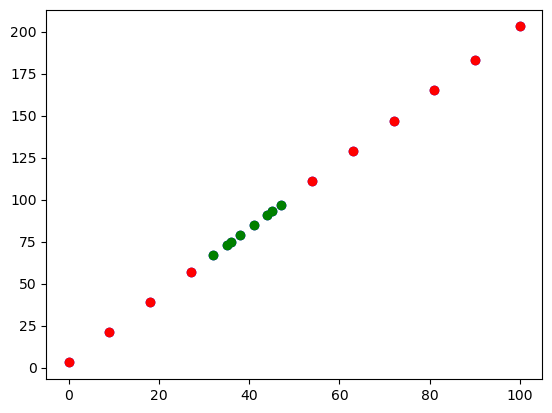

In [17]:
x1 = np.linspace(0, 100, 12, dtype=int)
x1 = np.append(x1, np.linspace(30, 50, 8, dtype=int))
x1 = np.sort(x1)
x1 = np.delete(x1, np.where(x1 == 30))
x1 = np.delete(x1, np.where(x1 == 50))
n = x1.size
x2 = 2*x1+3
coordinates = np.column_stack((x1, x2))
label = np.zeros(n, dtype=int)
plt.scatter(x1, x2, color="blue")
for i in range(n):
  if(30<x1[i]<50):
    label[i]=1
    plt.scatter(x1[i],x2[i],color="green")
  else:
    label[i]=0
    plt.scatter(x1[i],x2[i],color="red")

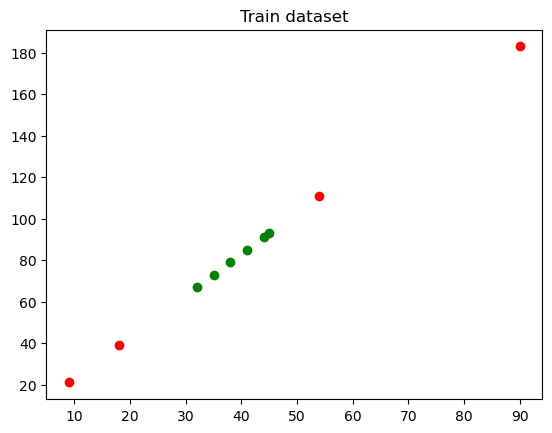

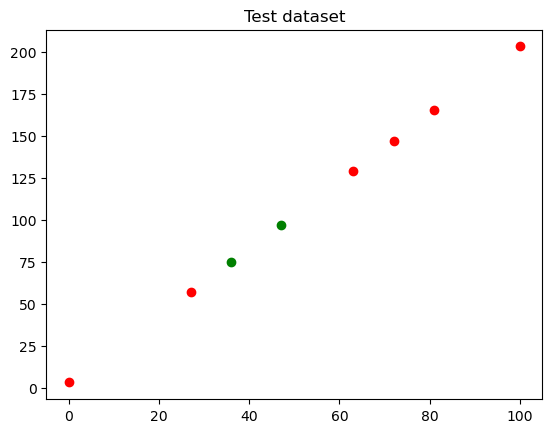

In [18]:
train_size=int(0.6*n)
indices=np.arange(0,n)
np.random.shuffle(indices)
train_indices=indices[:train_size]
test_indices=indices[train_size:]
X_train, X_test, Y_train, Y_test = coordinates[train_indices,:], coordinates[test_indices,:], label[train_indices], label[test_indices]

for i in range (X_train.T[0].size):
  if(Y_train[i]==1):
    plt.scatter(X_train[i][0], X_train[i][1], color="green")
  else:
    plt.scatter(X_train[i][0], X_train[i][1], color="red")
plt.title('Train dataset')
plt.show()

for i in range (X_test.T[0].size):
  if(Y_test[i]==1):
    plt.scatter(X_test[i][0], X_test[i][1], color="green")
  else:
    plt.scatter(X_test[i][0], X_test[i][1], color="red")
plt.title('Test dataset')
plt.show()

In [20]:
Classifier = SVC(gamma = 'auto', kernel = 'poly')
Classifier.fit(X_train, Y_train)

SVC(gamma='auto', kernel='poly')

In [21]:
from sklearn.metrics import accuracy_score

Y_pred_train=Classifier.predict(X_train)
Y_pred_test=Classifier.predict(X_test)
train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.88


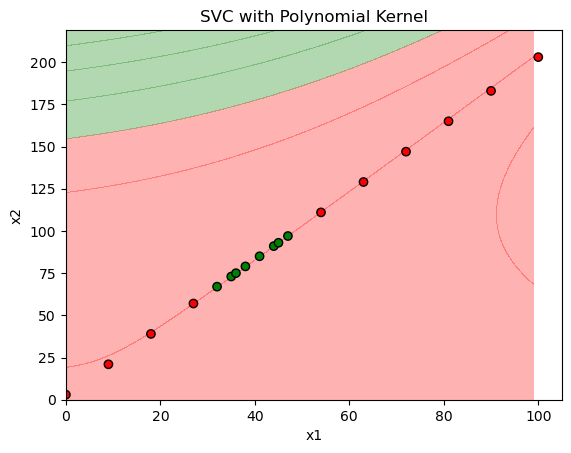

In [22]:
from matplotlib.colors import ListedColormap

xx, yy = np.meshgrid(np.arange(0, 100, 1), np.arange(0, 220, 1))
Z = Classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(['red', 'green']), alpha=0.3)
plt.scatter(x1, x2, c=label, cmap=ListedColormap(['red', 'green']), edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVC with Polynomial Kernel')
plt.show()